# Gurkirat Toor


## Research question/interests

    This notebook will focus on indepth research on competative RocketLeague rather than one broad topic,
this will answer the following reasearch questions: 

- Does more time spent on the defensive half correlate with more wins?
- Does playing faster than the opposing team prove to be a more successful strategy?

In [ ]:
import pandas as pd
import numpy as np
import project_function3 as pf 
import seaborn as sns
import matplotlib.pyplot as plt

Import the intial data from the raw csv file:

In [ ]:
raw = pd.read_csv('../data/raw/matches_by_teams.csv')
raw.head()

,match_id,color,team_id,team_slug,team_name,team_region,core_shots,core_goals,core_saves,core_assists,...,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score,winner
0,6159ad3d143c37878b2384a9,blue,6020bc8ef1e4807cc700391a,https://octane.gg/teams/391a-ground-zero-gaming,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,...,973.23,733.45,1967.99,1237.05,2339.78,865.27,6.0,7.0,3,True
1,6159ad3d143c37878b2384a9,orange,614c8930f8090ec745286474,https://octane.gg/teams/6474-ranga-roundup,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,...,1060.71,526.78,2209.56,998.99,2318.26,890.30,7.0,6.0,0,False
2,6159ad3d143c37878b2384aa,blue,6020bc70f1e4807cc70023fb,https://octane.gg/teams/23fb-renegades,RENEGADES,Oceania,46.0,21.0,10.0,21.0,...,1247.16,892.76,1972.65,1505.61,2616.06,862.25,11.0,7.0,3,True
3,6159ad3d143c37878b2384aa,orange,6156d4db143c37878b238367,https://octane.gg/teams/8367-trident-esports,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,...,1001.96,434.29,2600.17,859.84,2355.02,1105.02,7.0,11.0,0,False
4,6159ad3d143c37878b2384ab,blue,6020bc8ef1e4807cc7003915,https://octane.gg/teams/3915-dire-wolves,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,...,1586.90,998.94,2900.66,1718.97,3444.64,1174.96,13.0,8.0,3,True


Lets extract all the columns

In [ ]:
raw.columns

Index(['match_id', 'color', 'team_id', 'team_slug', 'team_name', 'team_region',
       'core_shots', 'core_goals', 'core_saves', 'core_assists', 'core_score',
       'core_shooting_percentage', 'boost_bpm', 'boost_bcpm',
       'boost_avg_amount', 'boost_amount_collected', 'boost_amount_stolen',
       'boost_amount_collected_big', 'boost_amount_stolen_big',
       'boost_amount_collected_small', 'boost_amount_stolen_small',
       'boost_count_collected_big', 'boost_count_stolen_big',
       'boost_count_collected_small', 'boost_count_stolen_small',
       'boost_amount_overfill', 'boost_amount_overfill_stolen',
       'boost_amount_used_while_supersonic', 'boost_time_zero_boost',
       'boost_time_full_boost', 'boost_time_boost_0_25',
       'boost_time_boost_25_50', 'boost_time_boost_50_75',
       'boost_time_boost_75_100', 'movement_total_distance',
       'movement_time_supersonic_speed', 'movement_time_boost_speed',
       'movement_time_slow_speed', 'movement_time_ground',
   

In [ ]:
df = pf.load_clean('../data/raw/matches_by_teams.csv')
df

,match_id,team_name,team_region,core_shots,core_goals,core_saves,core_assists,core_score,boost_bpm,boost_bcpm,...,movement_time_low_air,movement_time_high_air,movement_time_powerslide,positioning_time_defensive_third,positioning_time_neutral_third,positioning_time_offensive_third,defense_time,offense_time,score,winner
0,6159ad3d143c37878b2384a9,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,3405.0,3625.0,3756.75639,...,1274.14,210.83,63.24,1498.34,973.23,733.45,1967.99,1237.05,3,True
1,6159ad3d143c37878b2384a9,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,3139.0,3902.0,4081.96194,...,1260.34,175.53,82.76,1621.08,1060.71,526.78,2209.56,998.99,0,False
2,6159ad3d143c37878b2384aa,RENEGADES,Oceania,46.0,21.0,10.0,21.0,5671.0,3845.0,4227.54295,...,1385.74,238.28,80.29,1338.37,1247.16,892.76,1972.65,1505.61,3,True
3,6159ad3d143c37878b2384aa,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,2666.0,3579.0,3788.04349,...,1310.52,174.47,55.22,2023.76,1001.96,434.29,2600.17,859.84,0,False
4,6159ad3d143c37878b2384ab,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,4644.0,4778.0,5079.84800,...,1692.44,290.85,111.19,2033.79,1586.90,998.94,2900.66,1718.97,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,62e02371da9d7ca1c7bb2f61,TEAM BDS,Europe,61.0,18.0,29.0,14.0,7668.0,7378.0,7491.84496,...,2416.49,523.30,120.05,3017.10,2298.25,1516.41,4201.51,2630.25,4,True
10590,62e02371da9d7ca1c7bb2f62,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,7577.0,7370.0,7517.89859,...,2422.84,485.48,147.73,2835.11,1954.98,1243.93,3871.85,2162.11,4,True
10591,62e02371da9d7ca1c7bb2f62,FAZE CLAN,North America,50.0,5.0,26.0,4.0,5115.0,7923.0,7906.82117,...,2263.45,459.89,153.37,2714.51,1957.24,1341.10,3731.48,2281.36,2,False
10592,62e02371da9d7ca1c7bb2f63,TEAM BDS,Europe,36.0,10.0,19.0,8.0,5099.0,6041.0,6138.57559,...,1798.77,355.54,91.43,2510.52,1597.21,936.44,3358.93,1685.25,4,True


Lets make it easier to track the games and the level they played at by merging our other data with this one.

In [ ]:
result = pf.merge_dfs(df, '../data/raw/main.csv', 'match_id')
result = result.drop(columns=['match_id'])
result

,team_name,team_region,core_shots,core_goals,core_saves,core_assists,core_score,boost_bpm,boost_bcpm,boost_avg_amount,...,movement_time_powerslide,positioning_time_defensive_third,positioning_time_neutral_third,positioning_time_offensive_third,defense_time,offense_time,score,winner,event,event_split
0,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,3405.0,3625.0,3756.75639,454.34,...,63.24,1498.34,973.23,733.45,1967.99,1237.05,3,True,Regional 1,Fall
1,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,3139.0,3902.0,4081.96194,442.41,...,82.76,1621.08,1060.71,526.78,2209.56,998.99,0,False,Regional 1,Fall
2,RENEGADES,Oceania,46.0,21.0,10.0,21.0,5671.0,3845.0,4227.54295,469.57,...,80.29,1338.37,1247.16,892.76,1972.65,1505.61,3,True,Regional 1,Fall
3,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,2666.0,3579.0,3788.04349,399.09,...,55.22,2023.76,1001.96,434.29,2600.17,859.84,0,False,Regional 1,Fall
4,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,4644.0,4778.0,5079.84800,646.84,...,111.19,2033.79,1586.90,998.94,2900.66,1718.97,3,True,Regional 1,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8657,TEAM BDS,Europe,61.0,18.0,29.0,14.0,7668.0,7378.0,7491.84496,893.37,...,120.05,3017.10,2298.25,1516.41,4201.51,2630.25,4,True,World Championship,Summer
8658,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,7577.0,7370.0,7517.89859,860.63,...,147.73,2835.11,1954.98,1243.93,3871.85,2162.11,4,True,World Championship,Summer
8659,FAZE CLAN,North America,50.0,5.0,26.0,4.0,5115.0,7923.0,7906.82117,877.63,...,153.37,2714.51,1957.24,1341.10,3731.48,2281.36,2,False,World Championship,Summer
8660,TEAM BDS,Europe,36.0,10.0,19.0,8.0,5099.0,6041.0,6138.57559,754.93,...,91.43,2510.52,1597.21,936.44,3358.93,1685.25,4,True,World Championship,Summer


Now we got the clean dataset.

## Q1.Does more time spent on the defensive half correlate with more wins?

The first step to answering our question would be to determine if a team is defensive or
offensive. This will be determined by which side of the pitch the team spends most of its time.
To best visualize this data would be the wins based on the time of season.

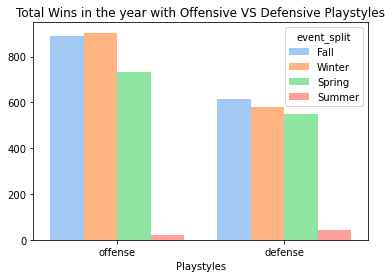

In [ ]:
mean_defense_time = df["defense_time"].mean()
q1_total = pf.play_stats(result, mean_defense_time)

total_plot = sns.countplot(data=q1_total, x = "playstyle", hue="event_split",palette='pastel', saturation=1)
total_plot.set(xlabel='Playstyles', ylabel='', title="Total Wins in the year with Offensive VS Defensive Playstyles")

plt.show()

From this graph we can see that overall teams that play on the defensice end most of the time lose. To think that this is an accurate representaion of our solution would be wrong because there are less defensive teams then there are offensive. These numbers demonstrate the values in a game where teams skill level may very so to mitigate that it maybe appropriate to look at only those teams that are higher in the tournament.


/Users/gurkirattoor/school/year3/cosc301/project-group40/project-group40/notebooks/project_function3.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1["playstyle"] = np.where(df['defense_time'] >= mean_defense_time, "defense", "offense")


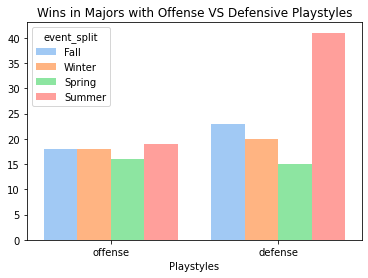

In [ ]:
x = result[(result['event'] == "Major") | (result['event'] == "World Championship")]
q1_majors = pf.play_stats(x, mean_defense_time)

major_plot = sns.countplot(data=q1_majors, x = "playstyle", hue="event_split",palette='pastel', saturation=2, order=['offense','defense'])
major_plot.set(xlabel='Playstyles', ylabel='', title="Wins in Majors with Offense VS Defensive Playstyles")
plt.show()

By filtering our data futher we are able to get a more accurate representation of how team that win the most play. The information dictates that a defense oriented team will win more often than an offensive minded team. 

## Q2:Does playing faster than the opposing team prove to be a more successful strategy?

Lets approach this problem with a graph that measures total distance travelled and goals scored. 

<seaborn.axisgrid.PairGrid object>


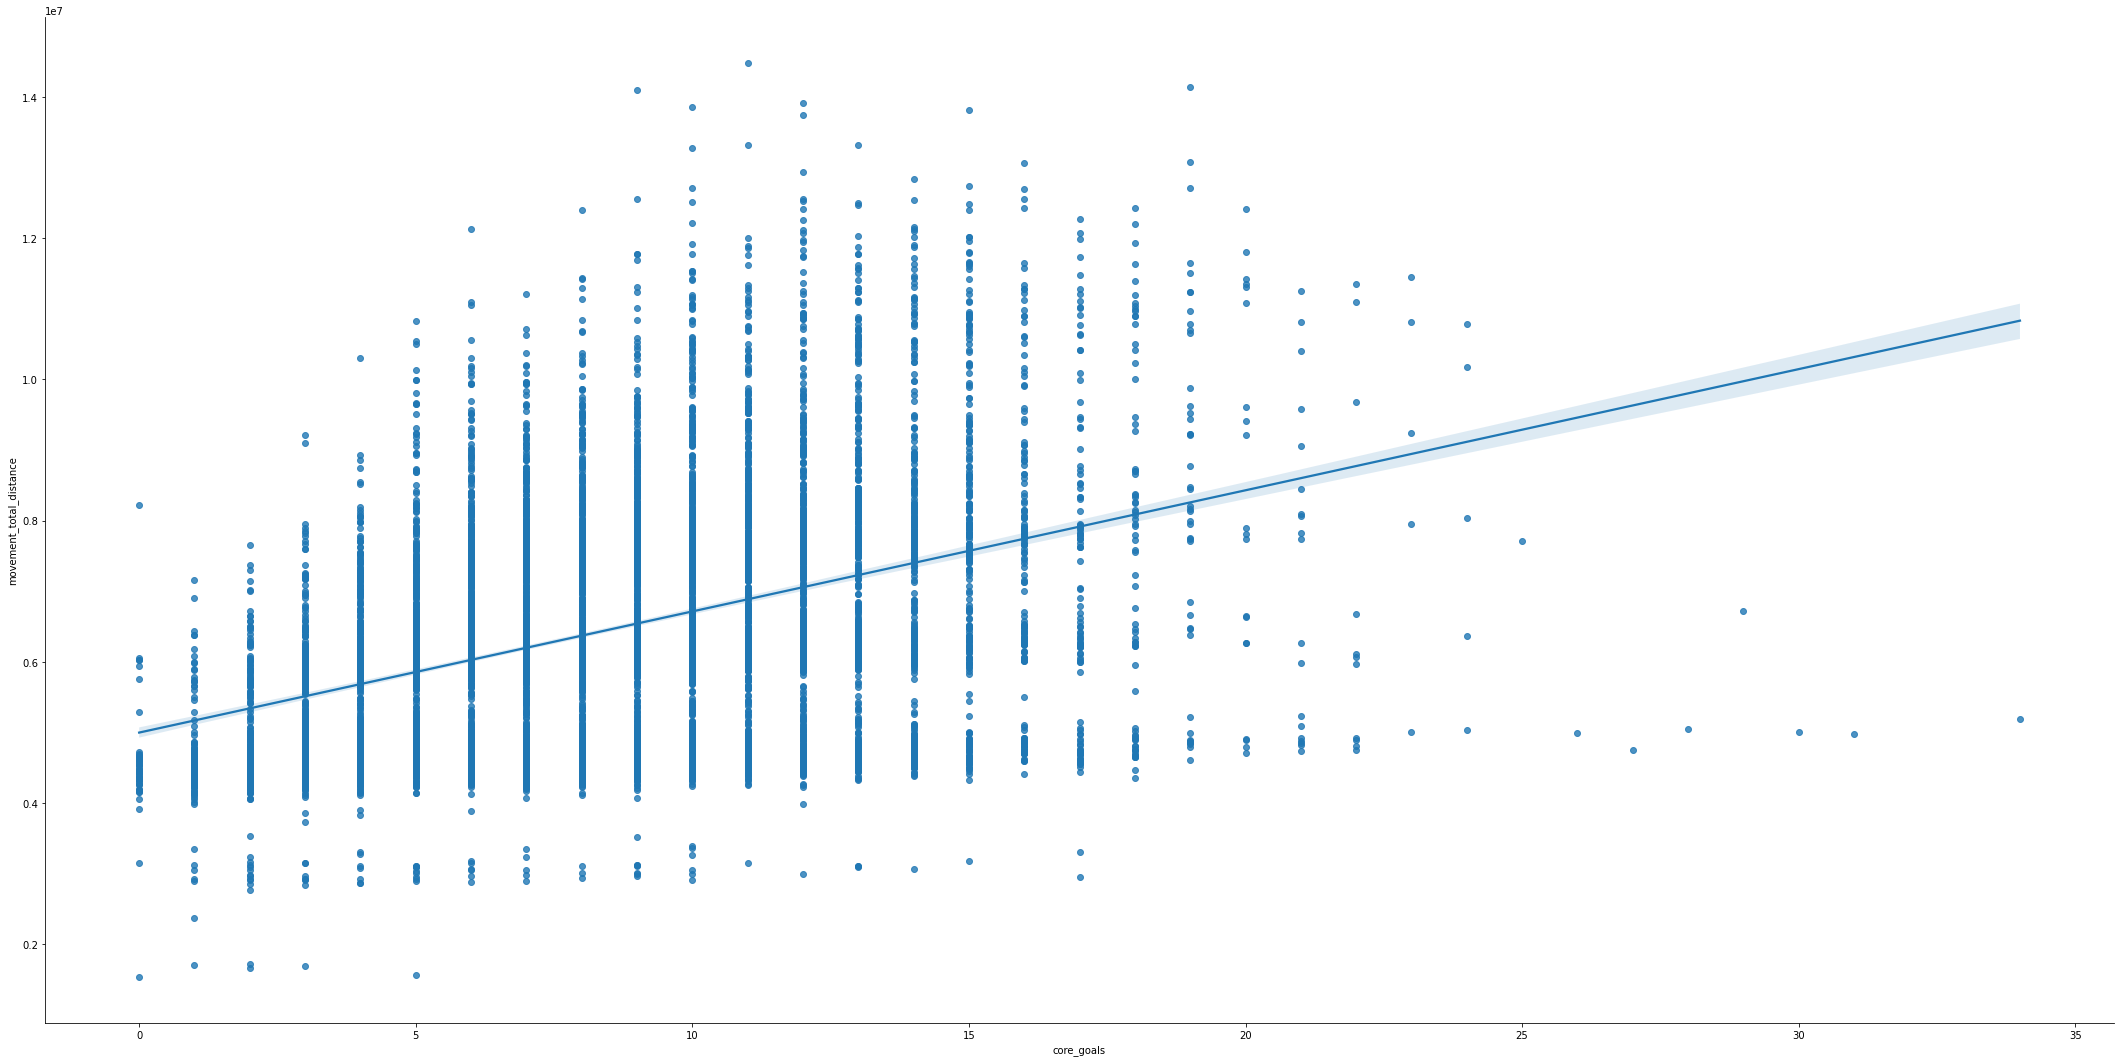

In [ ]:
graph1 = sns.pairplot(
    result,
    x_vars = ['core_goals'], y_vars = ['movement_total_distance'],height = 15,aspect = 2,kind = 'reg', )
print(graph1)



From this we can see that we can determine the speed of the team by the distance travelled in a match. We can see that when a team travels more distance they score more goals. Next, lets analyze the boost consumption per minute of the teams compared to the amount of goals they score.

In [ ]:
graph4 = raw[['core_goals','boost_bcpm']]
print (graph4)

       core_goals  boost_bcpm
0             9.0  3756.75639
1             5.0  4081.96194
2            21.0  4227.54295
3             4.0  3788.04349
4            12.0  5079.84800
...           ...         ...
10589        18.0  7491.84496
10590        14.0  7517.89859
10591         5.0  7906.82117
10592        10.0  6138.57559
10593         5.0  6499.56296

[10594 rows x 2 columns]


# Goals Vs

array([[<AxesSubplot:title={'center':'core_goals'}>,
        <AxesSubplot:title={'center':'boost_bcpm'}>]], dtype=object)

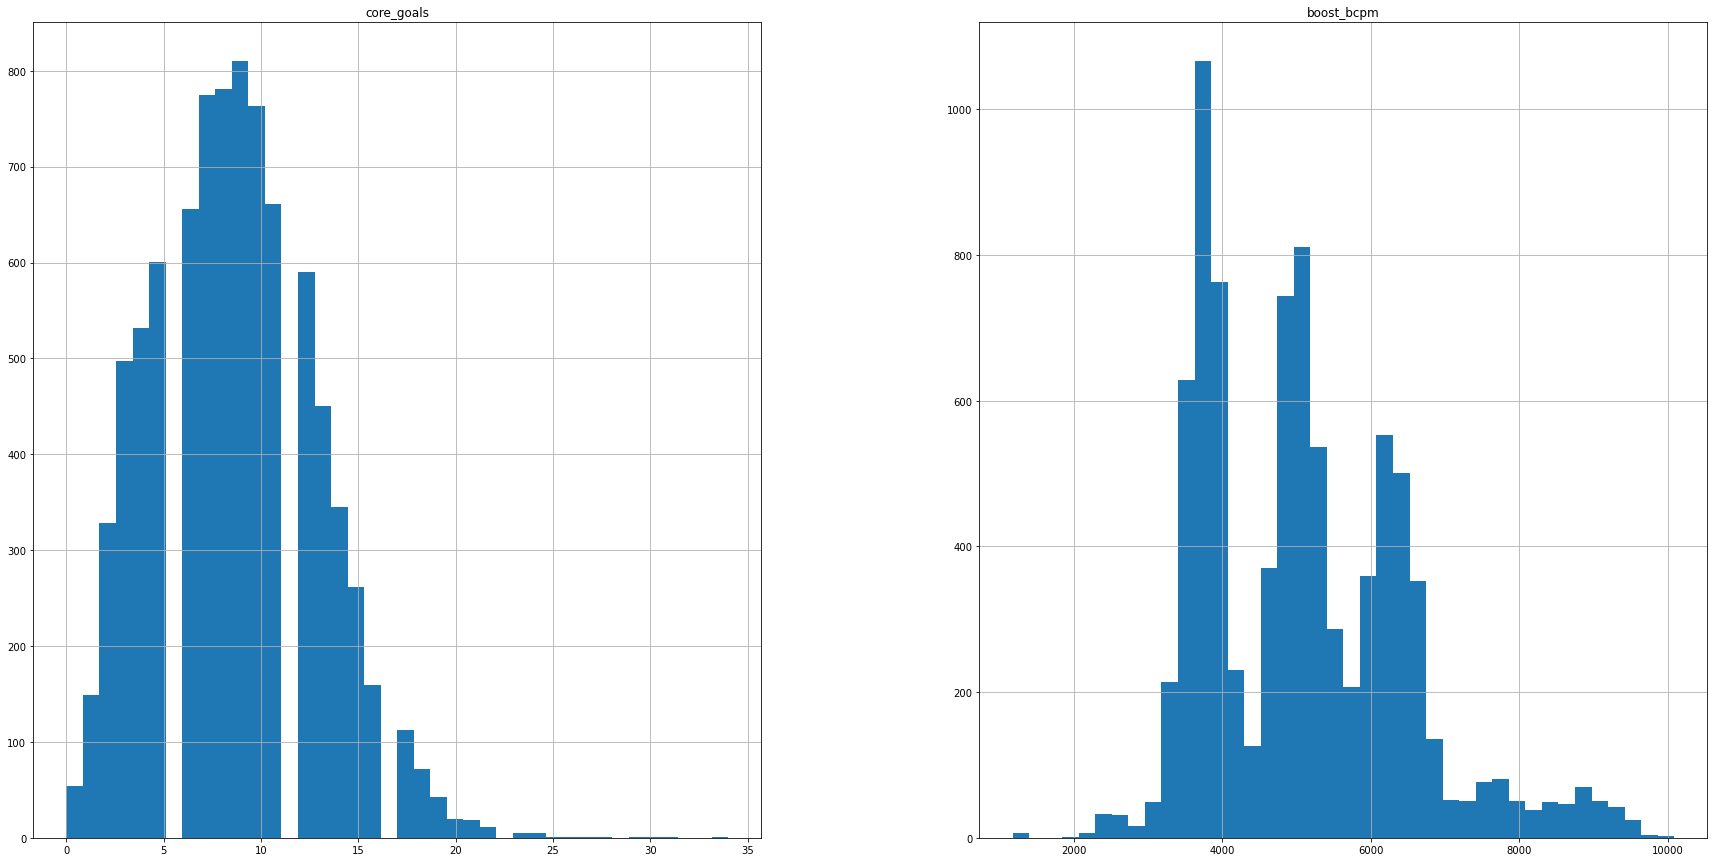

In [ ]:
graph4.hist(bins=40, figsize= (30,15))

From our histogram graph, we can see that from when boost consumption is highest teams ultimitely 
score more. In turn scoring more will result in you winning. From the information we gathered in this notebook we can conclude that a defensive team can and will be more successful in the World ChampionShip tournament and when they have more speed we are better equipped to win. 